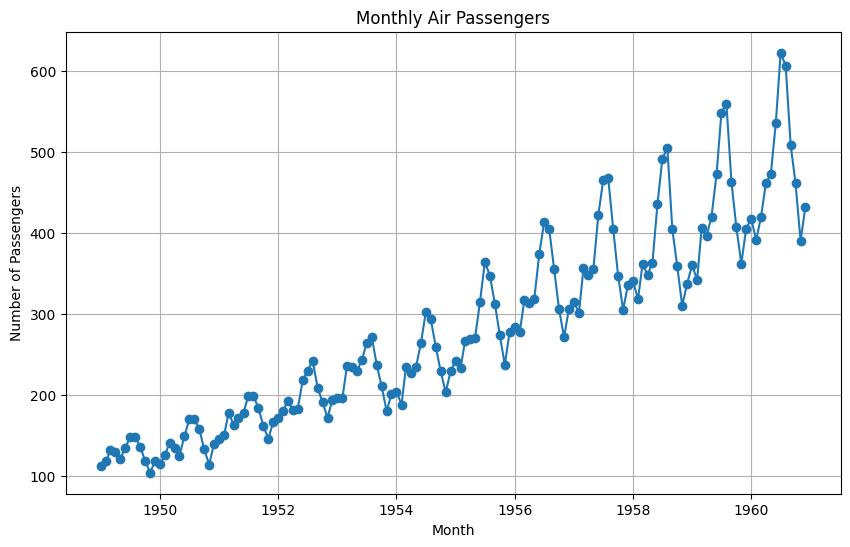

/Users/chen2636/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


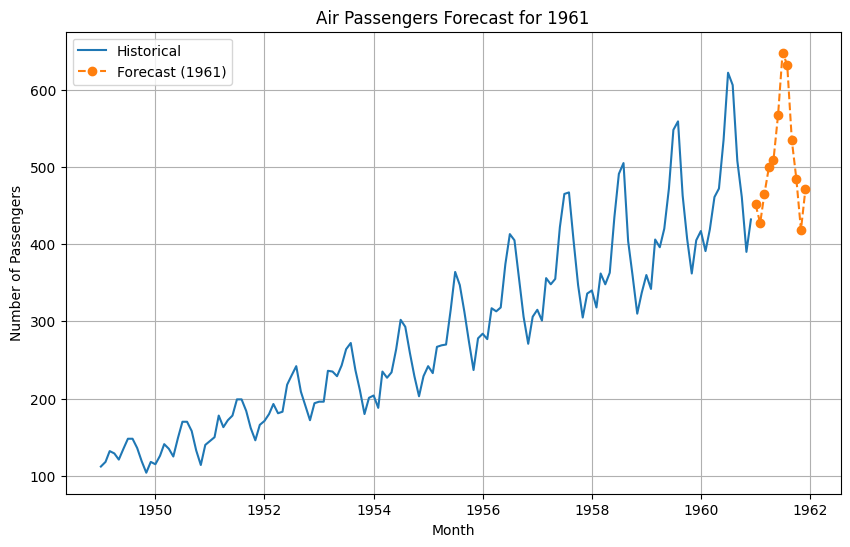

Forecast and historical data have been exported to '/Users/chen2636/Desktop/AAE625/HW3/AirPassengers_with_forecast.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
Dir = "/Users/chen2636/Documents/GitHub/AAE625_25/Untitled"
df = pd.read_csv(f'{Dir}/AirPassengers.csv', parse_dates=['Month'], index_col='Month')

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], marker='o')
plt.title("Monthly Air Passengers")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

model = ExponentialSmoothing(df['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit(optimized=True)

forecast = fit.forecast(12)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast (1961)', marker='o', linestyle='--')
plt.title("Air Passengers Forecast for 1961")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

forecast_df = pd.DataFrame({'#Passengers': forecast})
combined = pd.concat([df, forecast_df])

output_dir = "/Users/chen2636/Desktop/AAE625/HW3"
combined.to_csv(f'{output_dir}/AirPassengers_with_forecast.csv')

print(f"Forecast and historical data have been exported to '{output_dir}/AirPassengers_with_forecast.csv'.")
